In [2]:
from keras.models import Model
from keras.layers import *

def get_model():
    image_input = Input(shape=(784,))
    encoding_input = Input(shape=(64, ))
    encoder = Dense(int(encoding_input.shape[1]), activation="relu")(image_input)
    decoder = Dense(784, activation="sigmoid")(encoder)
    
    autoencoder = Model(image_input, decoder)
        
    encoder = Model(image_input, encoder)
    decoder = Model(encoding_input, autoencoder.layers[-1](encoding_input))
    return  autoencoder, encoder, decoder

autoencoder, encoder, decoder = get_model()

autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2447 - val_loss: 0.1608
Epoch 2/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.1411 - val_loss: 0.1244
Epoch 3/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.1165 - val_loss: 0.1072
Epoch 4/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.1030 - val_loss: 0.0969
Epoch 5/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0943 - val_loss: 0.0899
Epoch 6/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0883 - val_loss: 0.0850
Epoch 7/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0840 - val_loss: 0.0814
Epoch 8/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0810 - val_loss: 0.0790
Epoch 9/50
60000/60000 [==============================] - 5s 8

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

<IPython.core.display.Javascript object>


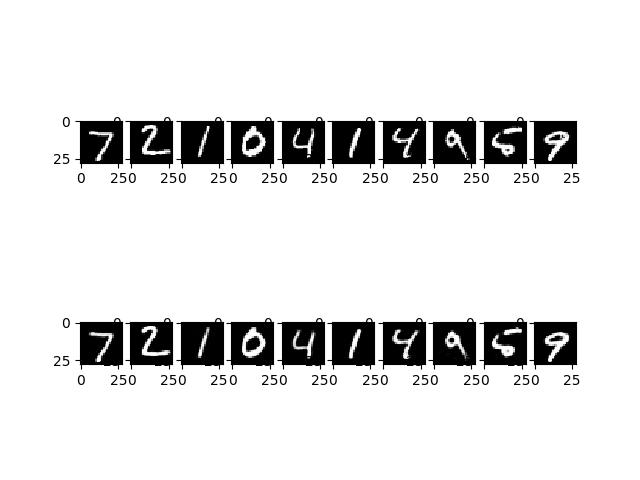

In [20]:
figure, axes = plt.subplots(2, 10)
for i in range(10):
    plt.gray()
    axes[0, i].imshow(x_test[i].reshape(28, 28))
    axes[1, i].imshow(decoded_imgs[i].reshape(28, 28))